# **Feature Extraction, Classification, Deep Learning and Regularization**
## **Data**
### **Fashion MNIST with a Twist**

In [7]:
# import libraries
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.model_selection import cross_validate
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
import time
import warnings

warnings.filterwarnings("ignore")

In [ ]:
# import dataset
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('testX.csv')
#train_df.shape
train_y = train_df['Label']
train_x = train_df.drop('Id',axis=1)
train_x = train_x.drop('Label',axis=1)
test_df.head()
test_x = test_df.drop('Id',axis=1)

## **Tasks**


### **Explore the dataset, analyse its properties:**

MNIST is datasets of 28x28 grayscale fashion images, consisting of a training dataset of 60,000 instances and a test dataset of 10,000 instances.

Each sample has 784 features to describe the 28x28 pixels and each pixel is a value from 0 to 255 specifying the greyscale RGB codes. In the training dataset, each image is associated with a label, either 0 to 4. the test dataset shares the same format without labels.

#### Properties: 
* Substance: 28×28 grayscale/single channel images
* Size: 60000 (training); 10000 (testing)
* Features: 784 features (28×28 pixels ranging from 0 to 255)
* Label: 5 labels (0, 1, 2, 3, 4)


In [3]:
# import dataset
train_df = pd.read_csv('/Users/jiangruiyin/Desktop/ece-657a-w20-asg3-part-1/train.csv')
test_df = pd.read_csv('/Users/jiangruiyin/Desktop/ece-657a-w20-asg3-part-1/testX.csv')
#train_df.shape
train_y = train_df['Label']
train_x = train_df.drop('Id',axis=1)
train_x = train_x.drop('Label',axis=1)
test_x = test_df.drop('Id',axis=1)

In [4]:
train_x.shape

(60000, 784)

In [5]:
test_x.shape

(10000, 784)

For visualization, the format of stored data in the training set can be changed to a combination of one-dimensional arrays.

In [8]:
train = train_df.drop('Id',axis=1)
X_train = train.ix[:,1:].values.astype(float)
y_train = train.ix[:,0].values
#y_train
#X_train

This is the visual effect of one data example (the 6th data in the trainning set).

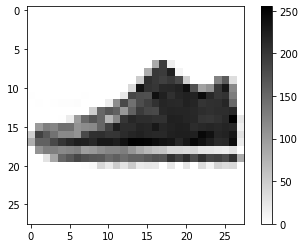

In [9]:
plt.figure()
plt.imshow(X_train[5].reshape((28,28)),cmap=plt.cm.binary)
plt.colorbar()
plt.grid(False)
plt.show()

The images with the labels can also be displayed.

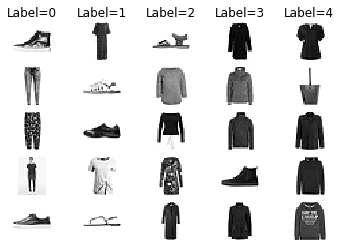

In [10]:
fig = plt.figure()

Nsample = 5 #Display part of the image classification results (5 rows)
labels = list(range(5))
for y in labels:
    d = train.ix[train['Label']==y, 1:].sample(n=Nsample).values
    for idx in range(Nsample):
        a = fig.add_subplot(Nsample, len(labels), idx * len(labels) + y + 1)
        plt.imshow(d[idx].reshape((28,28)),cmap=plt.cm.binary)
        plt.axis('off')
        if idx == 0:
            a.set_title('Label={}'.format(y))

plt.show()

### **Perform classification of the new label:**

#### **Question 1: Classification: Feature Extraction + Classical Method**

**1.1: Explanation of Design and Implementation Choices of your Model**

(Describe the underlying algorithms you are using, how they work and why you
chose them.)

1. Parameter tuning in SVM with PCA


Fitting 2 folds for each of 20 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:  3.2min
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:  7.1min
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed: 18.1min
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed: 22.3min
[Parallel(n_jobs=-1)]: Done  21 tasks      | elapsed: 33.2min
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed: 43.6min
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed: 56.2min
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed: 60.6min finished


[-0.86562915 -0.70598051 -0.63571722 -1.48706967 -0.86193757 -0.61953567
 -0.4808218  -1.51389174 -0.86390955 -0.62672309 -0.44358366 -1.51458213
 -0.86418216 -0.65155425 -0.4585508  -1.5155875  -0.86383466 -0.66344623
 -0.4593449  -1.51470692]


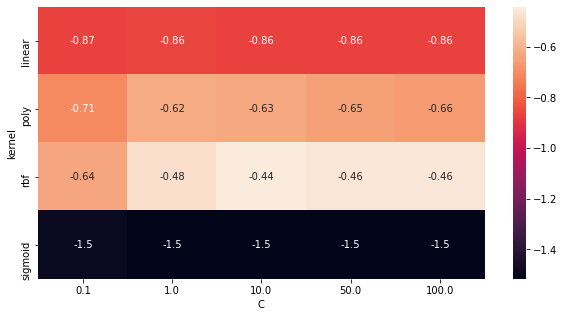

In [0]:
# find best c value and kernel using GridSearch

from sklearn.model_selection import GridSearchCV
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.model_selection import cross_validate
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
import time

import warnings

warnings.filterwarnings("ignore")


data = pd.read_csv('train.csv')[:10000]

y = data['Label']
X = data.drop('Id',axis=1)
X = X.drop('Label',axis=1)


params = {
        'C': [0.1,1,10,50,100],
          'kernel': ['linear','poly','rbf','sigmoid'],
          'gamma':['scale']
         }

svc = SVC(**params, probability=True)

cv = KFold(n_splits=2)

clf = GridSearchCV(svc, param_grid=params, scoring='neg_log_loss', n_jobs=-1, cv=cv, verbose=10)
clf.fit(X, y)

print(clf.cv_results_['mean_test_score'])

C = [clf.cv_results_['params'][i]['C'] for i in range(len(clf.cv_results_['params']))]
kernel = [clf.cv_results_['params'][i]['kernel'] for i in range(len(clf.cv_results_['params']))]

score = clf.cv_results_['mean_test_score']

results = pd.DataFrame({'C':C,'kernel':kernel,'score':score})


results = pd.pivot_table(results, values='score', 
                     index=['kernel'], 
                     columns='C')


# Visualize results by heat map
import seaborn as sns

fig, ax = plt.subplots(figsize=(10,5))
ax = sns.heatmap(results, annot=True)

plt.savefig('svc_param_tuning.png')

**1.2: Implementation of your Design Choices**

Implementation 1: SVM with PCA

In [0]:
train_x = train_x/255.0
test_x = test_x/255.0
start=time.time()
train_centered = train_x-np.mean(train_x,axis=0)
test_centered = test_x-np.mean(test_x,axis=0)


In [11]:
pca = PCA(0.9)
pca.fit(train_centered)
pca_train_x = pca.transform(train_centered)
pca_test_x = pca.transform(test_centered)
svc = SVC(gamma='scale',kernel='rbf',C=8)
svc.fit(pca_train_x,train_y)
preds = svc.predict(pca_test_x)
elapsed_svm_pca = (time.time() - start)
print("Time used:{:.2f}s".format(elapsed))

Time used:186.99s


In [0]:
output=pd.DataFrame({'Id':test_df['Id'],'Label':preds})

output.to_csv('output_svm_pca.csv',index=False)

**1.3: Kaggle Competition Score**

(Report the highest score your submissions received on Kaggle. If you have any
explanations for varying performance by different teams explain it here.)

**1.4: Results Analysis**

• Runtime performance for training and testing.



In [0]:
print("Time used in Impletation 1:{:.2f}s".format(elapsed_svm_pca))

Time used:186.99s


• Explanation of your model (algorithms, design choices, numbers of parameters)



• Use a ROC curve used for some method in your initial or results analysis such as exploring the impact on accuracy of some parameter.



• Evaluate your code with other metrics on the training data (by using some of it as test data) and argue for the benefit of you approach.

#### **Question 2: Classification : Convolutional Neural
Networks**

**2.1: Design and Implementation Choices of your Model (25
points)**

**2.3: Implementation of your Design Choices**

In [0]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from keras.utils import to_categorical
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import tensorflow as tf
import os
import tensorflow_datasets as tfds
# Deep Learning Libraries
from tensorflow.python import keras
from keras.models import Sequential, load_model
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization
from keras.optimizers import Adam,SGD,Adagrad,Adadelta,RMSprop
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau, LearningRateScheduler
from keras.utils import to_categorical
from keras.utils import plot_model
from IPython.display import SVG

In [0]:
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('testX.csv')
#train_df.shape
Y = train_df['Label']
train_x = train_df.drop('Id',axis=1)
X = train_x.drop('Label',axis=1)

test_x = test_df.drop('Id',axis=1)
# Splitting Data into Train and Validation Set
seed = 42
np.random.seed(seed)
x_train, x_val, y_train, y_val = train_test_split(X, Y, test_size=0.1, random_state=seed)
print(x_train.shape)
print(x_val.shape)
# pre-processing data
x_train = x_train.values.reshape((-1, 28, 28, 1))
x_val = x_val.values.reshape((-1, 28, 28, 1))
test_x = test_x.values.reshape((-1, 28, 28, 1))

x_train = x_train.astype("float32")/255
x_val = x_val.astype("float32")/255
test_x = test_x.astype("float32")/255

y_train = to_categorical(y_train, num_classes=10)
y_val = to_categorical(y_val, num_classes=10)



In [0]:
# Building a ConvNet
model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu', strides=1, padding='same', 
                 data_format='channels_last', input_shape=(28,28,1)))
model.add(BatchNormalization())

model.add(Conv2D(filters=32, kernel_size=(3, 3), activation='relu', strides=1, padding='same', 
                 data_format='channels_last'))
model.add(BatchNormalization())
model.add(Dropout(0.25))

model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu', strides=1, padding='same', 
                 data_format='channels_last'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
    
    
model.add(Conv2D(filters=128, kernel_size=(3, 3), activation='relu', strides=1, padding='same', 
                 data_format='channels_last'))
model.add(BatchNormalization())
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(128, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

# resolver = tf.distribute.cluster_resolver.TPUClusterResolver(tpu='grpc://' + os.environ['COLAB_TPU_ADDR'])
# tf.config.experimental_connect_to_cluster(resolver)
# # This is the TPU initialization code that has to be at the beginning.
# tf.tpu.experimental.initialize_tpu_system(resolver)
# strategy = tf.distribute.experimental.TPUStrategy(resolver)

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer='Adam',
              metrics=['accuracy'])

In [0]:
# plot_model(model, to_file='model.png')
# SVG(model_to_dot(model).create(prog='dot', format='svg'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 28, 28, 32)        320       
_________________________________________________________________
batch_normalization_1 (Batch (None, 28, 28, 32)        128       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 28, 28, 32)        9248      
_________________________________________________________________
batch_normalization_2 (Batch (None, 28, 28, 32)        128       
_________________________________________________________________
dropout_1 (Dropout)          (None, 28, 28, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 28, 28, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 64)       

In [0]:
#Model

reduce_lr = LearningRateScheduler(lambda x: 1e-4 * 0.9 ** x)
NO_EPOCHS = 40
BATCH_SIZE = 128
train_model = model.fit(x_train, y_train,
                  batch_size=BATCH_SIZE,
                  epochs=NO_EPOCHS,
                  verbose=2,
                  validation_data=(x_val, y_val),
                  callbacks = [reduce_lr])

Train on 54000 samples, validate on 6000 samples
Epoch 1/40
 - 13s - loss: 1.0494 - accuracy: 0.6532 - val_loss: 2.1210 - val_accuracy: 0.3625
Epoch 2/40
 - 10s - loss: 0.6483 - accuracy: 0.7668 - val_loss: 0.7280 - val_accuracy: 0.7193
Epoch 3/40
 - 10s - loss: 0.5648 - accuracy: 0.7911 - val_loss: 0.5883 - val_accuracy: 0.7615
Epoch 4/40
 - 10s - loss: 0.5147 - accuracy: 0.8078 - val_loss: 0.5587 - val_accuracy: 0.7752
Epoch 5/40
 - 10s - loss: 0.4889 - accuracy: 0.8168 - val_loss: 0.5157 - val_accuracy: 0.7902
Epoch 6/40
 - 10s - loss: 0.4592 - accuracy: 0.8242 - val_loss: 0.5500 - val_accuracy: 0.7808
Epoch 7/40
 - 10s - loss: 0.4405 - accuracy: 0.8324 - val_loss: 0.5136 - val_accuracy: 0.7927
Epoch 8/40
 - 10s - loss: 0.4323 - accuracy: 0.8358 - val_loss: 0.5631 - val_accuracy: 0.7845
Epoch 9/40
 - 10s - loss: 0.4113 - accuracy: 0.8430 - val_loss: 0.4859 - val_accuracy: 0.8022
Epoch 10/40
 - 10s - loss: 0.4017 - accuracy: 0.8456 - val_loss: 0.6191 - val_accuracy: 0.7653
Epoch 11/4

In [0]:
# generate labels
preds = model.predict_classes(test_x)
print(preds)
output=pd.DataFrame({'Id':test_df['Id'],'Label':preds})
print(test_df['Id'])
output.to_csv('output_cnn_v1.csv',index=False)

[3 4 0 ... 3 2 2]
0          0
1          1
2          2
3          3
4          4
        ... 
9995    9995
9996    9996
9997    9997
9998    9998
9999    9999
Name: Id, Length: 10000, dtype: int64


**2.4: Kaggle Competition Score**

**2.5: Results Analysis**